Task 8: Clusterring with K-Means

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris



In [2]:
#  Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)


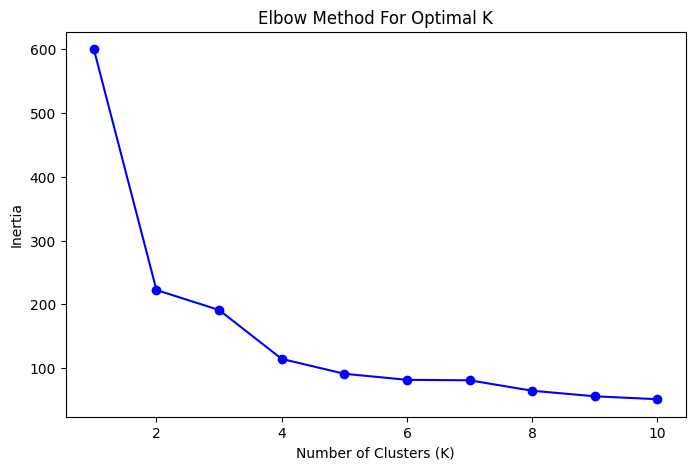

In [3]:
# Scale the data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [4]:
 #Fit KMeans with optimal K (assume K=3 from elbow)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

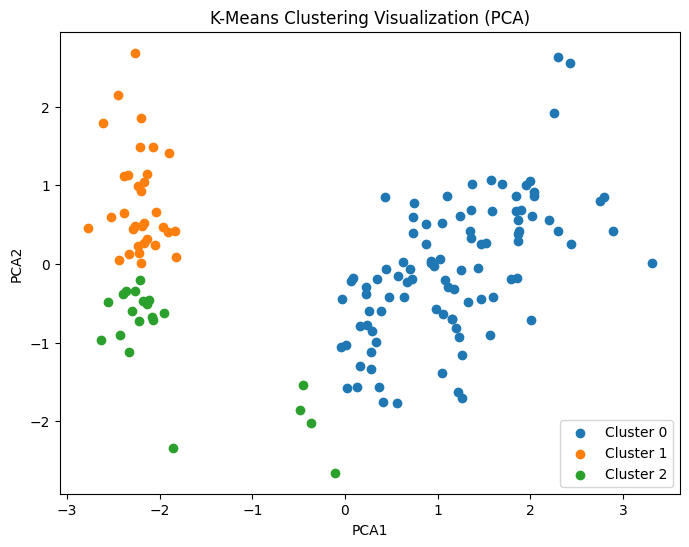

In [5]:
# Visualize Clusters (using PCA to reduce to 2D)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8,6))
for cluster in range(k):
    plt.scatter(
        df[df['Cluster'] == cluster]['PCA1'],
        df[df['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}'
    )

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering Visualization (PCA)')
plt.legend()
plt.show()

In [6]:
 #Evaluate using Silhouette Score
score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score for K={k}: {score:.3f}")


Silhouette Score for K=3: 0.480
